In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('cohort/sales_2018-01-01_2019-12-31.csv')

In [13]:
df

,day,customer_id,customer_type,total_sales
0,2018-01-01,65798701081,Returning,30.80
1,2018-01-01,263760969753,First-time,82.80
2,2018-01-01,4507624326,Returning,26.00
3,2018-01-01,5982990732,Returning,128.16
4,2018-01-01,31019499545,Returning,66.00
...,...,...,...,...
90295,2019-12-31,6348897036,Returning,-2.50
90296,2019-12-31,1216271089748,Returning,25.00
90297,2019-12-31,3068475408468,First-time,213.09
90298,2019-12-31,2949441028180,Returning,32.80


In [14]:
first_time = df.loc[df['customer_type'] == 'First-time',]
final = df.loc[df['customer_id'].isin(first_time['customer_id'].values)]

In [15]:
final = final.drop(columns = ['customer_type'])
final['day']= pd.to_datetime(final['day'], dayfirst=True, errors='coerce')

In [16]:
final = final.sort_values(['customer_id','day'])
final.reset_index(inplace = True, drop = True)

In [17]:
def purchase_rate(customer_id):
    purchase_rate = [1]
    counter = 1
    for i in range(1,len(customer_id)):
        if customer_id[i] != customer_id[i-1]:
                purchase_rate.append(1)
                counter = 1
        else:
                 counter += 1
                 purchase_rate.append(counter)
    return purchase_rate
def join_date(date, purchase_rate):
    join_date = list(range(len(date)))
    for i in range(len(purchase_rate)): 
        if purchase_rate[i] == 1:
                 join_date[i] = date[i]
        else:
                 join_date[i] = join_date[i-1]
    return join_date

def age_by_month(purchase_rate, month, year, join_month, join_year):
    age_by_month = list(range(len(year)))
    for i in range(len(purchase_rate)):
        if purchase_rate[i] == 1:
            age_by_month[i] = 0
        else:
            if year[i] == join_year[i]:
                age_by_month[i] = month[i] - join_month[i]
            else:
                age_by_month[i] = month[i] - join_month[i] + 12*(year[i]-join_year[i])
    return age_by_month

In [18]:
final['month'] =pd.to_datetime(final['day']).dt.month
final['Purchase Rate'] = purchase_rate(final['customer_id'])
final['Join Date'] = join_date(final['day'], final['Purchase Rate'])
final['Join Date'] = pd.to_datetime(final['Join Date'], dayfirst=True)
final['cohort'] = pd.to_datetime(final['Join Date']).dt.strftime('%Y-%m')
final['year'] = pd.to_datetime(final['day']).dt.year
final['Join Date Month'] = pd.to_datetime(final['Join Date']).dt.month
final['Join Date Year'] = pd.to_datetime(final['Join Date']).dt.year


In [19]:
final['Age by month'] = age_by_month(final['Purchase Rate'], final['month'],final['year'],final['Join Date Month'],final['Join Date Year'])

In [20]:
cohorts = final.groupby(['cohort','Age by month']).nunique()
cohorts = cohorts.customer_id.to_frame().reset_index()   # convert series to frame
cohorts = pd.pivot_table(cohorts, values = 'customer_id',index = 'cohort', columns= 'Age by month')
cohorts.replace(np.nan, '',regex=True)

Age by month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,510.0,67.0,71.0,52.0,53.0,52.0,63.0,57.0,47.0,48.0,...,74.0,65.0,55.0,55.0,65.0,58.0,43.0,58.0,82.0,56.0
2018-02,469.0,50.0,52.0,45.0,53.0,44.0,47.0,51.0,46.0,63.0,...,52.0,55.0,49.0,44.0,58.0,40.0,54.0,65.0,57.0,
2018-03,390.0,44.0,42.0,34.0,41.0,43.0,41.0,43.0,44.0,37.0,...,45.0,42.0,44.0,46.0,38.0,34.0,41.0,42.0,,
2018-04,349.0,30.0,34.0,33.0,40.0,21.0,40.0,34.0,42.0,40.0,...,33.0,34.0,35.0,31.0,40.0,36.0,25.0,,,
2018-05,318.0,22.0,24.0,28.0,25.0,17.0,21.0,23.0,35.0,42.0,...,37.0,31.0,24.0,29.0,32.0,31.0,,,,
2018-06,318.0,29.0,24.0,30.0,22.0,28.0,32.0,25.0,26.0,26.0,...,31.0,24.0,38.0,30.0,28.0,,,,,
2018-07,299.0,17.0,19.0,20.0,25.0,21.0,29.0,22.0,25.0,22.0,...,23.0,24.0,30.0,21.0,,,,,,
2018-08,275.0,11.0,22.0,22.0,30.0,18.0,21.0,23.0,18.0,20.0,...,16.0,28.0,23.0,,,,,,,
2018-09,224.0,10.0,26.0,12.0,14.0,15.0,20.0,18.0,15.0,18.0,...,18.0,15.0,,,,,,,,


How to interpret this table
Take cohort 2018–01 as an example. In Jan 2018, there were 462 new customers. Out of these 462, 121 customers came back and purchased in Feb 2018, 125 in Mar 2018 and so on and so forth.

In [21]:
for i in range(len(cohorts)-1):
    cohorts[i+1] = cohorts[i+1]/cohorts[0]
cohorts[0] = cohorts[0]/cohorts[0]

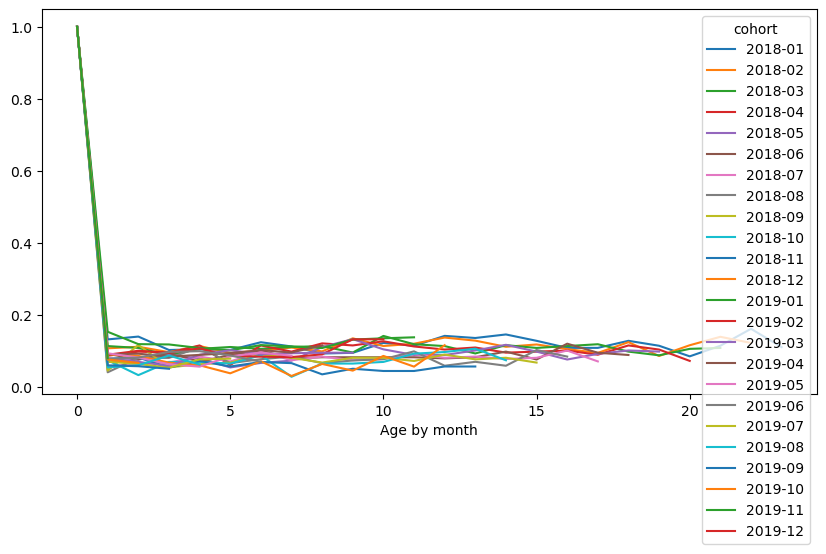

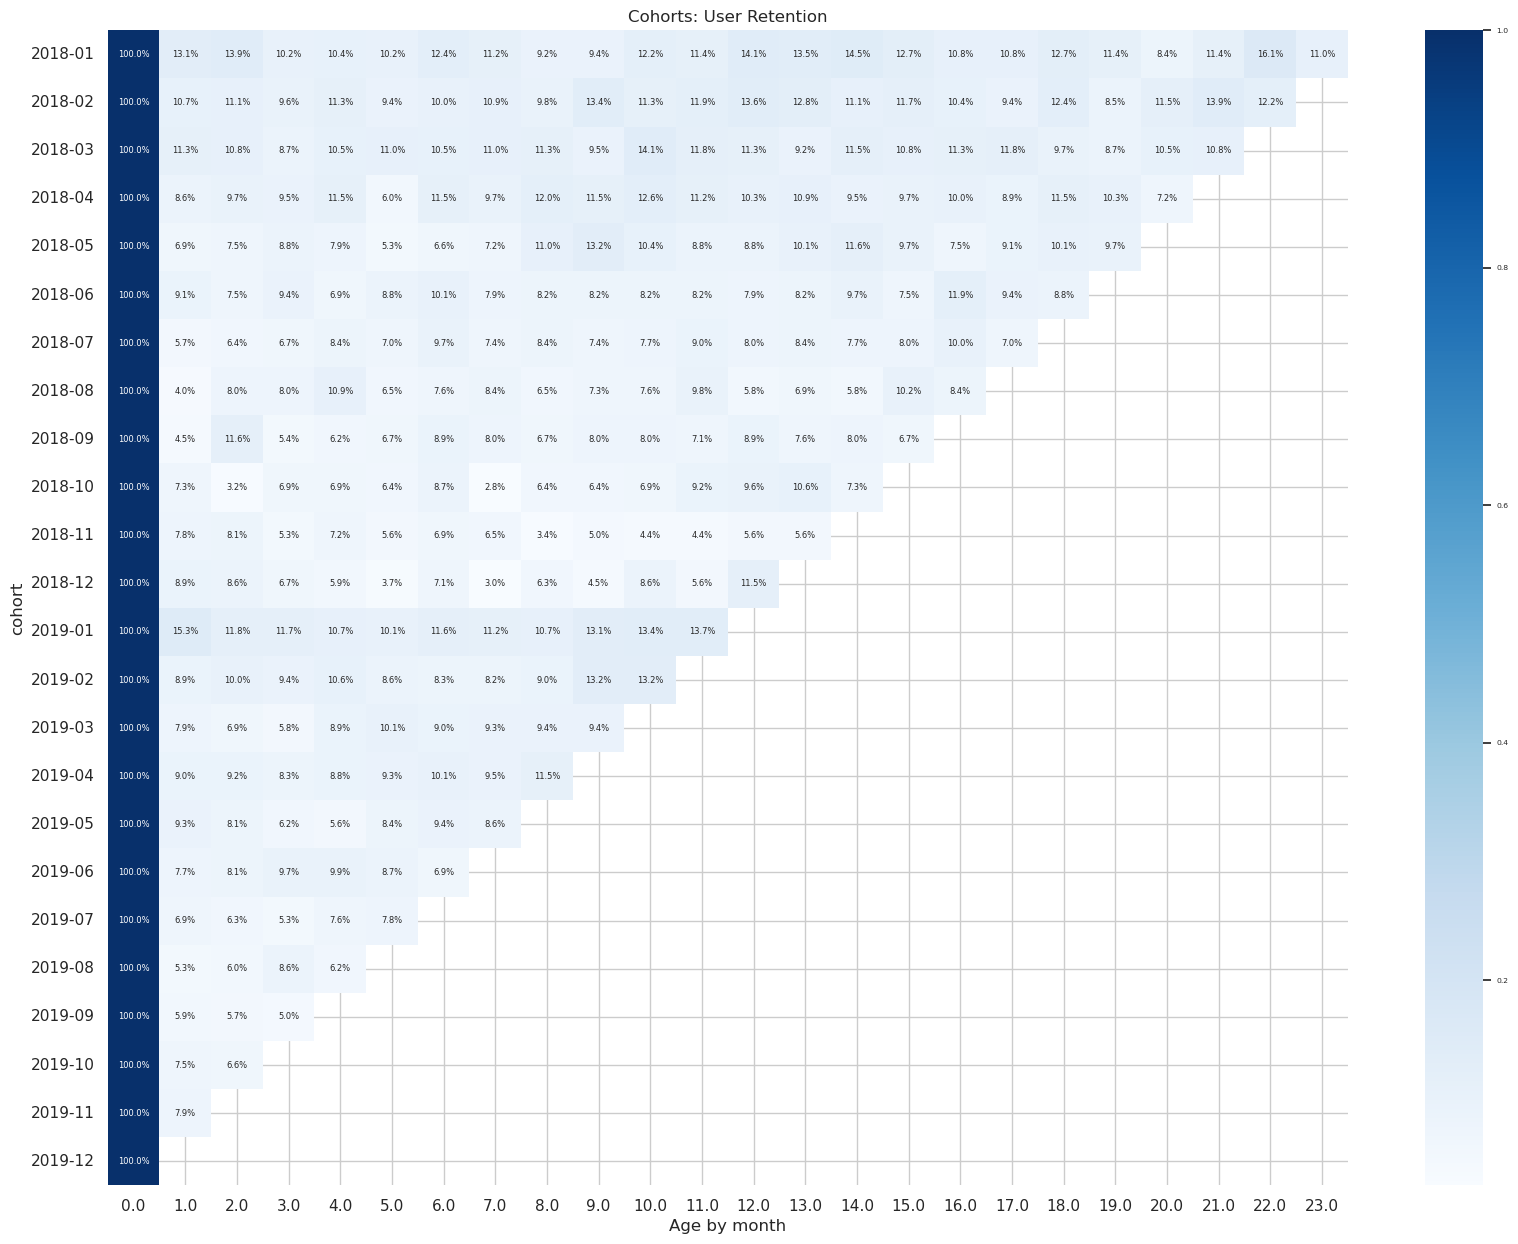

In [22]:
cohorts_t = cohorts.transpose()
cohorts_t[cohorts_t.columns].plot(figsize=(10,5))
sns.set(style='whitegrid')
plt.figure(figsize=(20, 15))
plt.title('Cohorts: User Retention')
sns.set(font_scale = 0.5) # font size
sns.heatmap(cohorts, mask=cohorts.isnull(),
cmap="Blues",
annot=True, fmt='.01%')
plt.show()